In [21]:
from citipy import citipy
from random import uniform
import requests, json
from config import api_key
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

pd.options.display.float_format = '{:,.2f}'.format # Set number formatting for all dataframes

In [22]:
# Generate list of cities based on randomly selected latitudes and longitudes

cities = []                                                       # Create empty list

for i in range(1, 1200):                                          # Note that I limit the latitude range a little.
    lat_coord  = round(uniform(-60,75), 2)                        # Antarctica and deep arctic aren't very useful and                     
    long_coord = round(uniform(-180, 180), 2)                     # skew the results
    
    city = citipy.nearest_city(lat_coord, long_coord).city_name   # Use Citipy to get name of city nearest the randomly
    cities.append(city)                                           # generated coordinates


In [23]:
# Remove duplicates from list of cities

initial_city_list_df = pd.DataFrame({"Cities" : cities})           # Create initial dataframe

clean_initial_city_list_df = initial_city_list_df.drop_duplicates(subset ="Cities",     
                     keep = 'first').reset_index(drop=True)        # Drop duplicates and reset index

clean_initial_city_list_df


,Cities
0,albany
1,cape town
2,tombouctou
3,aflu
4,olafsvik
...,...
620,harlingen
621,soure
622,meulaboh
623,kincardine


In [24]:
# Get weather data from OpenWeather API

url = "http://api.openweathermap.org/data/2.5/weather?"        # Base url
units = "metric"                                               # Set units to request

query_url = f"{url}appid={api_key}&units={units}&q="           # Build the query URL

lats = []                                                      # Set up lists to hold reponse info
longs = []
temps = []
humids = []
cloudies = []
wind_speeds = []

i = 1                                                          # Start a counter so that the print includes count

for city in clean_initial_city_list_df['Cities']:              # Loop through the list of cities 
                                                               # and perform a request for data on each
    response = requests.get(query_url + city).json()           # Get response and convert to json

    try:
        lat = response['coord']['lat']                         # Not all cities found in Citipy have data in 
        lng = response['coord']['lon']                        # OpenWeather. So this 'try' block will look for 
        temp = round(response['main']['temp'])                 # the data and set the respective variables...
        humid = response['main']['humidity']                    
        cloud = response['clouds']['all']
        wind = response['wind']['speed']
    
    except KeyError:                                           # ...And this 'except' block will set variables to 
        lat = np.nan                                           # np.nan for those cities that lack data. That way the
        lng = np.nan                                           # program won't blow up and later it will be easy to 
        temp = np.nan                                          # drop rows with missing data.                                           
        humid = np.nan                                           
        cloud = np.nan
        wind = np.nan
    
    lats.append(lat)                                           # Append data to respective lists
    longs.append(lng)
    temps.append(temp)
    humids.append(humid)
    cloudies.append(cloud)
    wind_speeds.append(wind)
    
    # Print the data being processed
    print (f"{i}: {city} lat: {lat}, lng: {lng}, temp: {temp}, humidity: {humid}, cloudiness: {cloud}, wind speed: {wind}")
    i+=1


1: albany lat: 42.6001, lng: -73.9662, temp: 4, humidity: 41, cloudiness: 5, wind speed: 4.47
2: cape town lat: -33.9258, lng: 18.4232, temp: 22, humidity: 56, cloudiness: 0, wind speed: 5.66
3: tombouctou lat: 20, lng: -3, temp: 39, humidity: 5, cloudiness: 1, wind speed: 1.54
4: aflu lat: nan, lng: nan, temp: nan, humidity: nan, cloudiness: nan, wind speed: nan
5: olafsvik lat: 64.8945, lng: -23.7142, temp: 6, humidity: 90, cloudiness: 100, wind speed: 6.21
6: bowmore lat: 34.9421, lng: -79.3031, temp: 7, humidity: 65, cloudiness: 1, wind speed: 2.06
7: chifeng lat: 42.2683, lng: 118.9636, temp: 13, humidity: 68, cloudiness: 32, wind speed: 6.36
8: katsuura lat: 35.1333, lng: 140.3, temp: 12, humidity: 67, cloudiness: 20, wind speed: 5.14
9: tasiilaq lat: 65.6145, lng: -37.6368, temp: 0, humidity: 69, cloudiness: 90, wind speed: 1.4
10: lyantonde lat: -0.4031, lng: 31.1572, temp: 18, humidity: 88, cloudiness: 100, wind speed: 1.94
11: cidreira lat: -30.1811, lng: -50.2056, temp: 21, 

85: ystad lat: 55.4297, lng: 13.8204, temp: 9, humidity: 40, cloudiness: 0, wind speed: 10.8
86: golspie lat: 57.9727, lng: -3.978, temp: 12, humidity: 58, cloudiness: 92, wind speed: 5.14
87: goderich lat: 43.7501, lng: -81.7165, temp: 5, humidity: 65, cloudiness: 1, wind speed: 4.12
88: barrow lat: 71.2906, lng: -156.7887, temp: -13, humidity: 85, cloudiness: 1, wind speed: 2.06
89: caravelas lat: -17.7125, lng: -39.2481, temp: 27, humidity: 65, cloudiness: 15, wind speed: 1.58
90: sao joao da barra lat: -21.6403, lng: -41.0511, temp: 23, humidity: 68, cloudiness: 0, wind speed: 2.57
91: sovetskiy lat: 61.3614, lng: 63.5842, temp: 6, humidity: 91, cloudiness: 100, wind speed: 3.41
92: sangar lat: 63.9242, lng: 127.4739, temp: -10, humidity: 94, cloudiness: 90, wind speed: 2.09
93: vila velha lat: -20.3297, lng: -40.2925, temp: 25, humidity: 78, cloudiness: 40, wind speed: 1.54
94: north bend lat: 43.4065, lng: -124.2243, temp: 6, humidity: 93, cloudiness: 90, wind speed: 3.09
95: cha

169: general jose eduvigis diaz lat: -27.1667, lng: -58.4167, temp: 21, humidity: 94, cloudiness: 79, wind speed: 2.57
170: gat lat: 31.61, lng: 34.7642, temp: 24, humidity: 50, cloudiness: 0, wind speed: 0.89
171: codrington lat: -38.2667, lng: 141.9667, temp: 12, humidity: 84, cloudiness: 100, wind speed: 2.93
172: port lincoln lat: -34.7333, lng: 135.8667, temp: 15, humidity: 65, cloudiness: 100, wind speed: 2.39
173: komsomolskiy lat: 40.4272, lng: 71.7189, temp: 22, humidity: 14, cloudiness: 4, wind speed: 2.06
174: muriti lat: -1.9833, lng: 32.9167, temp: 26, humidity: 69, cloudiness: 40, wind speed: 3.6
175: mount isa lat: -20.7333, lng: 139.5, temp: 23, humidity: 23, cloudiness: 3, wind speed: 5.66
176: vanavara lat: 60.34, lng: 102.2797, temp: 1, humidity: 88, cloudiness: 100, wind speed: 1.74
177: henties bay lat: -22.116, lng: 14.2845, temp: 21, humidity: 78, cloudiness: 20, wind speed: 4.47
178: buala lat: -8.145, lng: 159.5921, temp: 26, humidity: 83, cloudiness: 53, wind 

252: nefteyugansk lat: 61.0998, lng: 72.6035, temp: 12, humidity: 32, cloudiness: 0, wind speed: 6
253: jacqueville lat: 5.2052, lng: -4.4146, temp: 31, humidity: 74, cloudiness: 40, wind speed: 5.14
254: port alfred lat: -33.5906, lng: 26.891, temp: 23, humidity: 65, cloudiness: 1, wind speed: 11.09
255: mrirt lat: nan, lng: nan, temp: nan, humidity: nan, cloudiness: nan, wind speed: nan
256: poquoson lat: 37.1224, lng: -76.3458, temp: 9, humidity: 81, cloudiness: 1, wind speed: 1.54
257: savelugu lat: 9.6244, lng: -0.8253, temp: 38, humidity: 29, cloudiness: 72, wind speed: 3.14
258: kainantu lat: -6.2887, lng: 145.8655, temp: 16, humidity: 97, cloudiness: 99, wind speed: 1.1
259: opuwo lat: -18.0607, lng: 13.84, temp: 30, humidity: 21, cloudiness: 2, wind speed: 4.91
260: mahebourg lat: -20.4081, lng: 57.7, temp: 27, humidity: 78, cloudiness: 75, wind speed: 4.63
261: namwala lat: -15.7504, lng: 26.4384, temp: 30, humidity: 30, cloudiness: 0, wind speed: 2.57
262: yatou lat: 37.15, 

336: iquitos lat: -3.7481, lng: -73.2472, temp: 25, humidity: 88, cloudiness: 75, wind speed: 2.57
337: olawa lat: 50.9466, lng: 17.2926, temp: 8, humidity: 57, cloudiness: 20, wind speed: 9.26
338: turochak lat: 52.2576, lng: 87.1224, temp: 0, humidity: 96, cloudiness: 96, wind speed: 1.6
339: baykit lat: 61.67, lng: 96.37, temp: -1, humidity: 93, cloudiness: 40, wind speed: 1.09
340: uzhur lat: 55.3036, lng: 89.8339, temp: 2, humidity: 61, cloudiness: 100, wind speed: 4.56
341: hun lat: 29.1268, lng: 15.9477, temp: 39, humidity: 7, cloudiness: 1, wind speed: 7.57
342: maldonado lat: -34.6667, lng: -54.9167, temp: 19, humidity: 83, cloudiness: 20, wind speed: 5.14
343: yaan lat: 7.3833, lng: 8.5667, temp: 38, humidity: 33, cloudiness: 56, wind speed: 3.51
344: coquimbo lat: -29.9533, lng: -71.3436, temp: 15, humidity: 82, cloudiness: 90, wind speed: 2.06
345: sofiysk lat: nan, lng: nan, temp: nan, humidity: nan, cloudiness: nan, wind speed: nan
346: dhule lat: 20.9, lng: 74.7833, temp

421: whitianga lat: -36.8333, lng: 175.7, temp: 16, humidity: 97, cloudiness: 20, wind speed: 1.13
422: honiara lat: -9.4333, lng: 159.95, temp: 25, humidity: 88, cloudiness: 54, wind speed: 1.12
423: kyra lat: 49.5776, lng: 111.9753, temp: 3, humidity: 69, cloudiness: 99, wind speed: 1.4
424: maniitsoq lat: 65.4167, lng: -52.9, temp: 1, humidity: 67, cloudiness: 40, wind speed: 2.37
425: mbamba lat: 9.9833, lng: 13.1, temp: 39, humidity: 19, cloudiness: 99, wind speed: 2.41
426: margate lat: 51.3813, lng: 1.3862, temp: 11, humidity: 48, cloudiness: 1, wind speed: 0.89
427: darab lat: 28.7519, lng: 54.5444, temp: 33, humidity: 11, cloudiness: 77, wind speed: 2.42
428: madoc lat: 44.5084, lng: -77.4745, temp: 4, humidity: 52, cloudiness: 1, wind speed: 3.09
429: longyearbyen lat: 78.2186, lng: 15.6401, temp: -7, humidity: 63, cloudiness: 40, wind speed: 2.57
430: deputatskiy lat: 69.3, lng: 139.9, temp: -19, humidity: 99, cloudiness: 99, wind speed: 1.38
431: ust-omchug lat: 61.15, lng:

505: aklavik lat: 68.2191, lng: -135.0107, temp: -11, humidity: 67, cloudiness: 86, wind speed: 3.6
506: languyan lat: 5.2618, lng: 120.0807, temp: 27, humidity: 78, cloudiness: 83, wind speed: 1.34
507: palembang lat: -2.9167, lng: 104.7458, temp: 28, humidity: 78, cloudiness: 20, wind speed: 3.6
508: messina lat: 38.1933, lng: 15.5497, temp: 17, humidity: 67, cloudiness: 40, wind speed: 1.54
509: khatanga lat: 71.9667, lng: 102.5, temp: 1, humidity: 95, cloudiness: 100, wind speed: 7.87
510: smidovich lat: 48.6, lng: 133.8167, temp: 11, humidity: 53, cloudiness: 92, wind speed: 6.94
511: makakilo city lat: 21.3469, lng: -158.0858, temp: 22, humidity: 73, cloudiness: 1, wind speed: 2.06
512: guelengdeng lat: nan, lng: nan, temp: nan, humidity: nan, cloudiness: nan, wind speed: nan
513: myitkyina lat: 25.3833, lng: 97.4, temp: 30, humidity: 35, cloudiness: 100, wind speed: 1.07
514: adrar lat: 20.5022, lng: -10.0711, temp: 35, humidity: 7, cloudiness: 0, wind speed: 2.45
515: muros lat

588: andenes lat: 69.3143, lng: 16.1194, temp: 2, humidity: 87, cloudiness: 75, wind speed: 4.63
589: dharchula lat: 29.85, lng: 80.5333, temp: 14, humidity: 86, cloudiness: 55, wind speed: 2.21
590: coahuayana lat: 18.7333, lng: -103.6833, temp: 24, humidity: 31, cloudiness: 20, wind speed: 1.05
591: hualmay lat: -11.0964, lng: -77.6139, temp: 20, humidity: 84, cloudiness: 46, wind speed: 2.79
592: amahai lat: -3.3333, lng: 128.9167, temp: 27, humidity: 82, cloudiness: 31, wind speed: 2.48
593: kuito lat: -12.3833, lng: 16.9333, temp: 23, humidity: 56, cloudiness: 0, wind speed: 3.09
594: avera lat: 33.194, lng: -82.5271, temp: 6, humidity: 100, cloudiness: 1, wind speed: 1.4
595: mocuba lat: -16.8392, lng: 36.9856, temp: 27, humidity: 57, cloudiness: 16, wind speed: 1.82
596: kudahuvadhoo lat: 2.6708, lng: 72.8944, temp: 29, humidity: 67, cloudiness: 33, wind speed: 4.84
597: katima mulilo lat: -17.5, lng: 24.2667, temp: 31, humidity: 23, cloudiness: 0, wind speed: 1.84
598: anloga l

In [32]:
#Build a new data frame with with weather data

weather_data_df = pd.DataFrame({"City" : clean_initial_city_list_df['Cities'],
                                "Latitude": lats,
                                "Degrees From Equator": list(map(abs, lats)),   # The intention of the 'Degrees from 
                                "Longitude" : longs,                            # Equator' column isto establish an
                                "Temperature" : temps,                          # absolute value of the latitude, or 
                                "Humidity" : humids,                            # basically the distance from equator
                                "Cloudiness" : cloudies,                        # This will come in handy later for
                                "Wind Speed" : wind_speeds                      # plotting 
                              })                          

count1 = len(weather_data_df)                                                   # Count cities in dataframe  
print(f"Number of cities in dataframe: {count1}")                               # Print count 
weather_data_df.head()                                                          # Show the head sample 


Number of cities in dataframe: 625


,City,Latitude,Degrees From Equator,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,albany,42.60,42.60,-73.97,4.00,41.00,5.00,4.47
1,cape town,-33.93,33.93,18.42,22.00,56.00,0.00,5.66
2,tombouctou,20.00,20.00,-3.00,39.00,5.00,1.00,1.54
3,aflu,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,olafsvik,64.89,64.89,-23.71,6.00,90.00,100.00,6.21


In [33]:
# Remove cities with missing weather data from dataframe and save the data in a .csv file

clean_weather_data_df= weather_data_df.dropna(how='any')          # Use .dropna() to remove rows with missing data


clean_weather_data_df.to_csv("weather-data.csv", index=False)     # Save the dataframe above to .csv file

count2 = len(clean_weather_data_df)                               # Get a new city count
print(f"{count1 - count2} cities were removed. Number of cities in cleaned dataframe: {count2}") #Print the updated count
clean_weather_data_df.head()                                      # Show the head sample 

40 cities were removed. Number of cities in cleaned dataframe: 585


,City,Latitude,Degrees From Equator,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,albany,42.60,42.60,-73.97,4.00,41.00,5.00,4.47
1,cape town,-33.93,33.93,18.42,22.00,56.00,0.00,5.66
2,tombouctou,20.00,20.00,-3.00,39.00,5.00,1.00,1.54
4,olafsvik,64.89,64.89,-23.71,6.00,90.00,100.00,6.21
5,bowmore,34.94,34.94,-79.30,7.00,65.00,1.00,2.06


In [34]:
# Set up some basic plt formatting configurations

plt.rc('font', size=12)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=20)

# Create a function to match labels to a the correlation r coefficients. This will come in handy below 

def r_label(r):
    abs_r = abs(r)
    if abs_r >= .8 : return "Very Strong"
    elif abs_r >= .6 : return "Strong"
    elif abs_r >= .4: return "Moderate"
    elif abs_r >= .2: return "Low"
    else: return "Negligible"

# Set up list of variables to compare with latitude. This gets plugged into a for loop in the following sections

master_plot_list = ["Temperature", "Humidity", "Cloudiness", "Wind Speed"]   
                                                                            

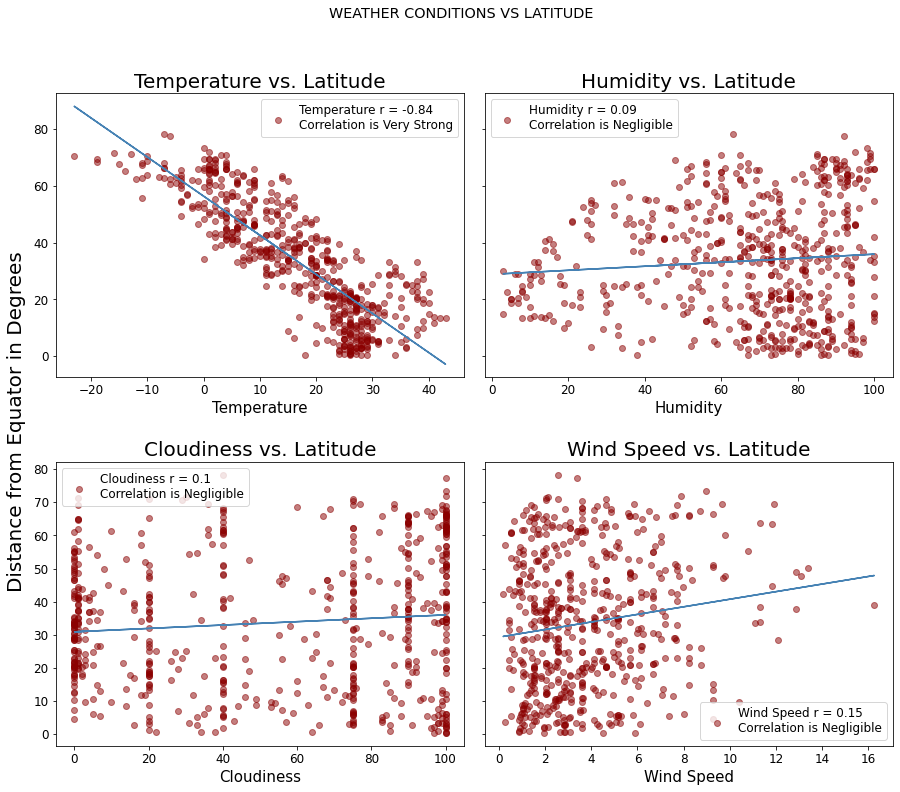

In [35]:
                # PLOTTING WEATHER CONDITIONS VS. LATITUDE USING A FOR LOOP   

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, sharey='row', figsize=(15,12))    # Set up figure for subplots

plot_list = [ax0, ax1, ax2, ax3]                                # Set up list of plots to help with the for loop below

plt.subplots_adjust(hspace=.3, wspace=0.05)                     # Formatting        
fig.suptitle('WEATHER CONDITIONS VS LATITUDE', ha='center')     # Set title for the whole figure

fig.text(.08, .5, "Distance from Equator in Degrees",           # Set label for shared y axis. This seemed to be
         va='center', rotation='vertical', fontsize=20,         # the easiest way. 
         linespacing = 2)  

for i in range (4):                                             # Aaaaaand.Here.We.Go!

    x_axis_name = master_plot_list[i]                           # Set name of x axis for the sake of labels
    x_axis = clean_weather_data_df[x_axis_name]                 # Set up x axis values 
    y_axis = clean_weather_data_df["Degrees From Equator"]      # Set up y axis values 

    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_axis, y_axis)  # Get elements of regression equation
    regress_values = x_axis * slope + intercept                 # Calculate regression values
              
    plot_list[i].set_xlabel(f"{x_axis_name}")                   # Set x axis label for subplot                  
    plot_list[i].set_title(f"{x_axis_name} vs. Latitude")       # Set title for subplot
    
    r = round(stats.pearsonr(x_axis, y_axis)[0],2)              # Calculate correlation coefficient
    rlabel = r_label(r)                                         # Call function to create a label for the r number

    plot_list[i].scatter(x_axis, y_axis, facecolors="darkred",  alpha=.5,     # Plot the scatter chart
                         label=f"{x_axis_name} r = {r} \nCorrelation is {rlabel}")   # and label it for the legend                                                

    plot_list[i].legend()                                        # Add the legend
    
    plot_list[i].plot(x_axis, regress_values, color="steelblue") # Plot the regression line
                                               
plt.savefig("weather-conditions-vs-latitude.png")                # Save the png file   

plt.show()


                                                    CONCLUSIONS
As you can see from the charts above, the correlation between temperature and distance from the equator (i.e., positive and negative latitudes) is very strong, supporting the assertion that climates get warmer as you get closer to the equator. 

All other weather conditions (humidity, cloudiness and wind speed) have negligible correlations. 

In [36]:
#Create new dataframes for the Northern and Southern Hemisphere cities

north_hem_df = clean_weather_data_df.loc[clean_weather_data_df['Latitude'] > 0, ].reset_index(drop=True)

south_hem_df = clean_weather_data_df.loc[clean_weather_data_df['Latitude'] <= 0, ].reset_index(drop=True)

south_hem_df.head()

,City,Latitude,Degrees From Equator,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,cape town,-33.93,33.93,18.42,22.00,56.00,0.00,5.66
1,lyantonde,-0.40,0.40,31.16,18.00,88.00,100.00,1.94
2,cidreira,-30.18,30.18,-50.21,21.00,74.00,65.00,6.22
3,rio grande,-32.03,32.03,-52.10,20.00,94.00,20.00,6.17
4,souillac,-20.52,20.52,57.52,27.00,78.00,75.00,4.63


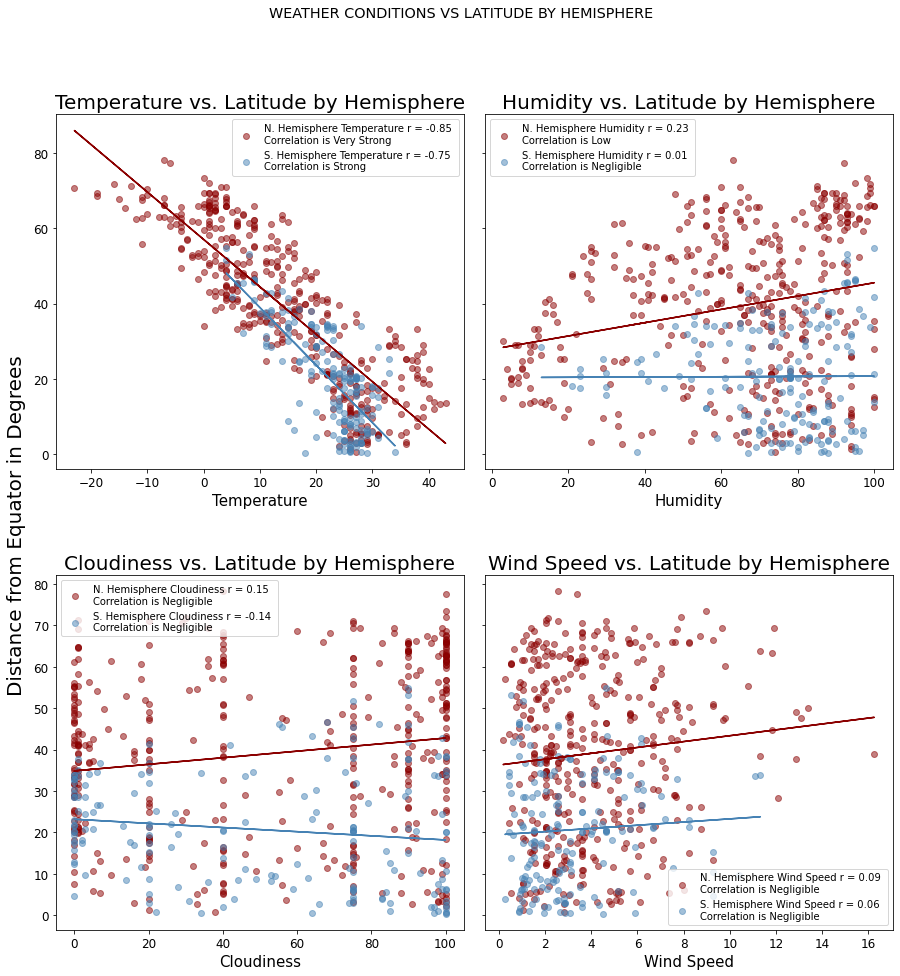

In [37]:
        # PLOTTING WEATHER CONDITIONS BY HEMISPHERE VS. LATITUDE USING A FOR LOOP

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, sharey='row', figsize=(15,15))    # Set up figure for subplots

plot_list = [ax0, ax1, ax2, ax3]                               # Set up list of plots to help with the for loop below

plt.subplots_adjust(hspace=.3, wspace=0.05)                    # Formatting
fig.suptitle('WEATHER CONDITIONS VS LATITUDE BY HEMISPHERE', ha='center') # Set title for the whole figure

fig.text(.08, 0.5, "Distance from Equator in Degrees",         # Set label for shared y axis. This seemed to be         
         va='center', rotation='vertical', fontsize=20)

for i in range (4):   

        # Northern Hemisphere
    north_x_axis_name = master_plot_list[i]                           # Set name of x axis for the sake of labels
    north_x_axis = north_hem_df[north_x_axis_name]                    # Set up x axis values 
    north_y_axis = north_hem_df["Degrees From Equator"]               # Set up y axis values 

    slope, intercept, rvalue, pvalue, stderr = stats.linregress(north_x_axis, north_y_axis)  # Get elements of regression equation
    north_regress_values = north_x_axis * slope + intercept           # Calculate regression values

    north_r = round(stats.pearsonr(north_x_axis, north_y_axis)[0],2)  # Calculate correlation coefficient
    north_r_label = r_label(north_r)                                  # Call function to create a label for the r number                                
    
        # Southern Hemisphere
    south_x_axis_name = master_plot_list[i]                           # Set name of x axis for the sake of labels
    south_x_axis = south_hem_df[south_x_axis_name]                    # Set up x axis values 
    south_y_axis = south_hem_df["Degrees From Equator"]               # Set up y axis values 
    
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(south_x_axis, south_y_axis)  # Get elements of regression equation
    south_regress_values = south_x_axis * slope + intercept                 # Calculate regression values   
    
    south_r = round(stats.pearsonr(south_x_axis, south_y_axis)[0],2)  # Calculate correlation coefficient
    south_r_label = r_label(south_r)                                  # Call function to create a label for the r number
    
    # Formatting
    plot_list[i].set_xlabel(f"{north_x_axis_name}")                   # Set x axis label for subplot              
    plot_list[i].set_title(f"{north_x_axis_name} vs. Latitude by Hemisphere") # Set title for subplot 
     
        
    # Plotting
        # Northern Hemisphere
    plot_list[i].scatter(north_x_axis, north_y_axis, facecolors="darkred",  alpha=.5,     # Plot the scatter chart
        label=f"N. Hemisphere {north_x_axis_name} r = {north_r} \nCorrelation is {north_r_label}")                                                  

    plot_list[i].plot(north_x_axis, north_regress_values, color="darkred")         # Plot the regression line
    
        # Southern Hemisphere
    plot_list[i].scatter(south_x_axis, south_y_axis, facecolors="steelblue",  alpha=.5,   # Plot the scatter chart
        label=f"S. Hemisphere {south_x_axis_name} r = {south_r} \nCorrelation is {south_r_label}")                                                 

    plot_list[i].plot(south_x_axis, south_regress_values, color="steelblue")         # Plot the regression line    
       
    plot_list[i].legend(fontsize=10)                                   # Add the legend
    
plt.savefig("weather-conditions-vs-latitude-by-hemisphere.png")        # Save the png file   

plt.show()


This analysis by hemisphere doesn't change the initial results. Temperature is still the only weather variable that has a strong correlation to latitude, although on several random samples, the correlation is a little stronger in southern hemisphere compared to the north. 


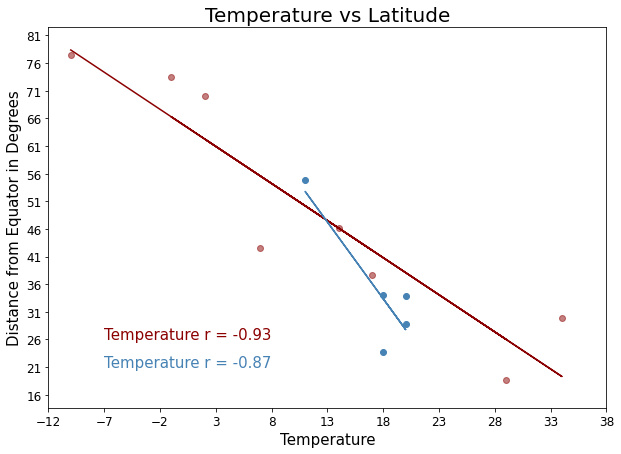

In [422]:
                                    # TEMPERATURE VS LATITUDE BY HEMISPHERE
# Data & calculations

    # Northern Hemisphere
north_x_axis_name = master_plot_list[0]                           # Set name of x axis for the sake of labels
north_x_axis = north_hem_df[north_x_axis_name]                          # Set up x axis values 
north_y_axis = north_hem_df["Degrees From Equator"]               # Set up y axis values 

slope, intercept, rvalue, pvalue, stderr = stats.linregress(north_x_axis, north_y_axis)  # Get elements of regression equation
north_regress_values = north_x_axis * slope + intercept                 # Calculate regression values

    # Southern Hemisphere
south_x_axis_name = master_plot_list[0]                           # Set name of x axis for the sake of labels
south_x_axis = south_hem_df[south_x_axis_name]                          # Set up x axis values 
south_y_axis = south_hem_df["Degrees From Equator"]               # Set up y axis values 

slope, intercept, rvalue, pvalue, stderr = stats.linregress(south_x_axis, south_y_axis)  # Get elements of regression equation
south_regress_values = south_x_axis * slope + intercept                 # Calculate regression values

# Formating

plt.figure(figsize=(10, 7))                                       # Set up figure size a little larger than default                    
plt.xlabel(f"{north_x_axis_name}")                                # Set x axis label                              
plt.ylabel("Distance from Equator in Degrees")                    # Set y axis label
plt.title(f"{north_x_axis_name} vs Latitude")                     # Set chart title
plt.xlim(north_x_axis.min()-2, north_x_axis.max()+2)              # Give chart some white space at margins
plt.ylim(north_y_axis.min()-5, north_y_axis.max()+5)
plt.xticks(range(int(north_x_axis.min()-2),                       # Set up ticks on the x axis 
                 int(north_x_axis.max())+5,5), rotation=0 )  
plt.yticks(range(int(north_y_axis.min()-2),                       # Set up ticks on the y axis
                 int(north_y_axis.max())+5,5), rotation=0 )
     
# Plotting 

    # Northern Hemisphere
plt.scatter(north_x_axis, north_y_axis, facecolors="darkred",  alpha=.5) # Plot the scatter chart
plt.annotate(f"{north_x_axis_name} r = {round(stats.pearsonr(north_x_axis, north_y_axis)[0],2)}", # Plot the correlation coeficient
             (-7,26), fontsize=15, color="darkred")                                                   

plt.plot(north_x_axis, north_regress_values, color="darkred")         # Plot the regression line

    # Southern Hemisphere
plt.scatter(south_x_axis, south_y_axis, facecolors="steelblue",  alpha=1) # Plot the scatter chart
plt.annotate(f"{south_x_axis_name} r = {round(stats.pearsonr(south_x_axis, south_y_axis)[0],2)}", # Plot the correlation coeficient
             (-7,21), fontsize=15, color="steelblue")                                                   

plt.plot(south_x_axis, south_regress_values, color="steelblue")         # Plot the regression line



plt.show()


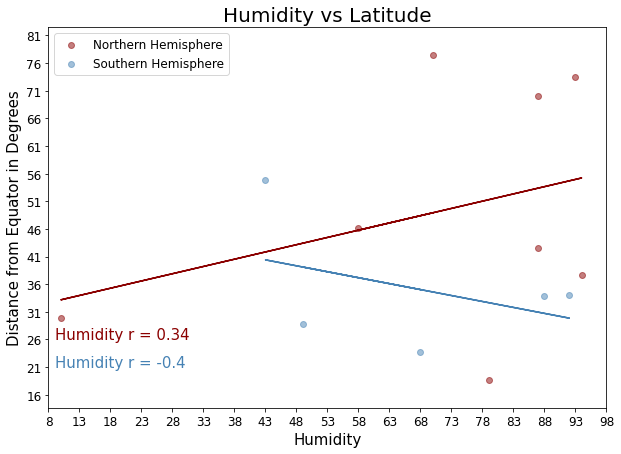

In [449]:
                                    # HUMIDITY VS LATITUDE BY HEMISPHERE
# Data & calculations

    # Northern Hemisphere
north_x_axis_name = master_plot_list[1]                           # Set name of x axis for the sake of labels
north_x_axis = north_hem_df[north_x_axis_name]                          # Set up x axis values 
north_y_axis = north_hem_df["Degrees From Equator"]               # Set up y axis values 

slope, intercept, rvalue, pvalue, stderr = stats.linregress(north_x_axis, north_y_axis)  # Get elements of regression equation
north_regress_values = north_x_axis * slope + intercept                 # Calculate regression values

    # Southern Hemisphere
south_x_axis_name = master_plot_list[1]                           # Set name of x axis for the sake of labels
south_x_axis = south_hem_df[south_x_axis_name]                          # Set up x axis values 
south_y_axis = south_hem_df["Degrees From Equator"]               # Set up y axis values 

slope, intercept, rvalue, pvalue, stderr = stats.linregress(south_x_axis, south_y_axis)  # Get elements of regression equation
south_regress_values = south_x_axis * slope + intercept                 # Calculate regression values

# Formating

fig, ax = plt.subplots()                                          # Set up subplots to make the legend easier to create
fig.set_size_inches(10, 7)                                        # Set up figure size a little larger than default                    
plt.xlabel(f"{north_x_axis_name}")                                # Set x axis label                              
plt.ylabel("Distance from Equator in Degrees")                    # Set y axis label
plt.title(f"{north_x_axis_name} vs Latitude")                     # Set chart title
plt.xlim(north_x_axis.min(), north_x_axis.max())                    # Give chart some white space at margins
plt.ylim(north_y_axis.min()-5, north_y_axis.max()+5)
plt.xticks(range(int(north_x_axis.min()-2),                       # Set up ticks on the x axis 
                 int(north_x_axis.max())+5,5), rotation=0 )  
plt.yticks(range(int(north_y_axis.min()-2),                       # Set up ticks on the y axis
                 int(north_y_axis.max())+5,5), rotation=0 )
# Plotting 

    # Northern Hemisphere
ax.scatter(north_x_axis, north_y_axis, facecolors="darkred",  alpha=.5, label='Northern Hemisphere') # Plot the scatter chart
ax.annotate(f"{north_x_axis_name} r = {round(stats.pearsonr(north_x_axis, north_y_axis)[0],2)}", # Plot the correlation coeficient
             (9,26), fontsize=15, color="darkred")                                                   

ax.plot(north_x_axis, north_regress_values, color="darkred")         # Plot the regression line

    # Southern Hemisphere
ax.scatter(south_x_axis, south_y_axis, facecolors="steelblue",  alpha=.5, label='Southern Hemisphere') # Plot the scatter chart
ax.annotate(f"{south_x_axis_name} r = {round(stats.pearsonr(south_x_axis, south_y_axis)[0],2)}", # Plot the correlation coeficient
             (9,21), fontsize=15, color="steelblue")                                                   

ax.plot(south_x_axis, south_regress_values, color="steelblue")         # Plot the regression line

plt.legend()                                                           # Add the legend
plt.show()



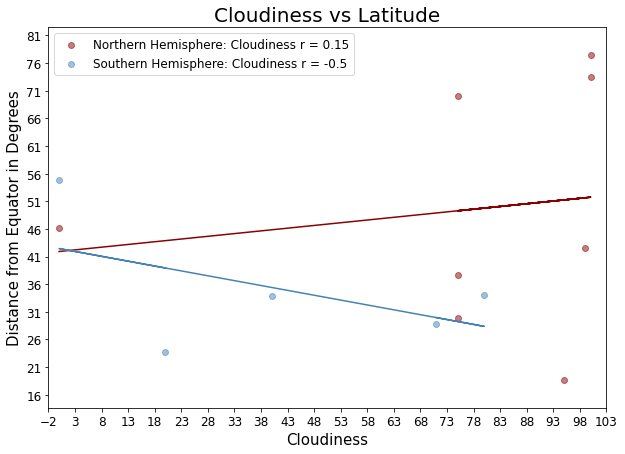

In [455]:
                                    # CLOUDINESS VS LATITUDE BY HEMISPHERE
# Data & calculations

    # Northern Hemisphere
north_x_axis_name = master_plot_list[2]                           # Set name of x axis for the sake of labels
north_x_axis = north_hem_df[north_x_axis_name]                          # Set up x axis values 
north_y_axis = north_hem_df["Degrees From Equator"]               # Set up y axis values 

slope, intercept, rvalue, pvalue, stderr = stats.linregress(north_x_axis, north_y_axis)  # Get elements of regression equation
north_regress_values = north_x_axis * slope + intercept                 # Calculate regression values

    # Southern Hemisphere
south_x_axis_name = master_plot_list[2]                           # Set name of x axis for the sake of labels
south_x_axis = south_hem_df[south_x_axis_name]                          # Set up x axis values 
south_y_axis = south_hem_df["Degrees From Equator"]               # Set up y axis values 

slope, intercept, rvalue, pvalue, stderr = stats.linregress(south_x_axis, south_y_axis)  # Get elements of regression equation
south_regress_values = south_x_axis * slope + intercept                 # Calculate regression values

# Formating

fig, ax = plt.subplots()                                          # Set up subplots to make the legend easier to create
fig.set_size_inches(10, 7)                                        # Set up figure size a little larger than default                    
plt.xlabel(f"{north_x_axis_name}")                                # Set x axis label                              
plt.ylabel("Distance from Equator in Degrees")                    # Set y axis label
plt.title(f"{north_x_axis_name} vs Latitude")                     # Set chart title
plt.xlim(north_x_axis.min(), north_x_axis.max())                    # Give chart some white space at margins
plt.ylim(north_y_axis.min()-5, north_y_axis.max()+5)
plt.xticks(range(int(north_x_axis.min()-2),                       # Set up ticks on the x axis 
                 int(north_x_axis.max())+5,5), rotation=0 )  
plt.yticks(range(int(north_y_axis.min()-2),                       # Set up ticks on the y axis
                 int(north_y_axis.max())+5,5), rotation=0 )
# Plotting 

    # Northern Hemisphere
ax.scatter(north_x_axis, north_y_axis, facecolors="darkred",  alpha=.5,  # Plot the scatter chart
           label=f"Northern Hemisphere: {north_x_axis_name} r = {round(stats.pearsonr(north_x_axis, north_y_axis)[0],2)}")                                                  

ax.plot(north_x_axis, north_regress_values, color="darkred")       # Plot the regression line

    # Southern Hemisphere
ax.scatter(south_x_axis, south_y_axis, facecolors="steelblue",  alpha=.5, # Plot the scatter chart
           label=f"Southern Hemisphere: {south_x_axis_name} r = {round(stats.pearsonr(south_x_axis, south_y_axis)[0],2)}")                                                 

ax.plot(south_x_axis, south_regress_values, color="steelblue")     # Plot the regression line

plt.legend()                                                       # Add the legend
plt.show()



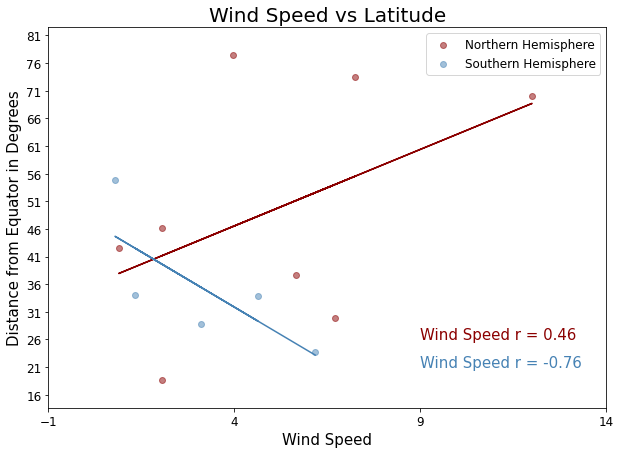

In [447]:
                                    # WIND SPEED VS LATITUDE BY HEMISPHERE
# Data & calculations

    # Northern Hemisphere
north_x_axis_name = master_plot_list[3]                           # Set name of x axis for the sake of labels
north_x_axis = north_hem_df[north_x_axis_name]                          # Set up x axis values 
north_y_axis = north_hem_df["Degrees From Equator"]               # Set up y axis values 

slope, intercept, rvalue, pvalue, stderr = stats.linregress(north_x_axis, north_y_axis)  # Get elements of regression equation
north_regress_values = north_x_axis * slope + intercept                 # Calculate regression values

    # Southern Hemisphere
south_x_axis_name = master_plot_list[3]                           # Set name of x axis for the sake of labels
south_x_axis = south_hem_df[south_x_axis_name]                          # Set up x axis values 
south_y_axis = south_hem_df["Degrees From Equator"]               # Set up y axis values 

slope, intercept, rvalue, pvalue, stderr = stats.linregress(south_x_axis, south_y_axis)  # Get elements of regression equation
south_regress_values = south_x_axis * slope + intercept                 # Calculate regression values

# Formating

fig, ax = plt.subplots()                                          # Set up subplots to make the legend easier to create
fig.set_size_inches(10, 7)                                        # Set up figure size a little larger than default                    
plt.xlabel(f"{north_x_axis_name}")                                # Set x axis label                              
plt.ylabel("Distance from Equator in Degrees")                    # Set y axis label
plt.title(f"{north_x_axis_name} vs Latitude")                     # Set chart title
plt.xlim(north_x_axis.min(), north_x_axis.max())                    # Give chart some white space at margins
plt.ylim(north_y_axis.min()-5, north_y_axis.max()+5)
plt.xticks(range(int(north_x_axis.min()-2),                       # Set up ticks on the x axis 
                 int(north_x_axis.max())+5,5), rotation=0 )  
plt.yticks(range(int(north_y_axis.min()-2),                       # Set up ticks on the y axis
                 int(north_y_axis.max())+5,5), rotation=0 )
# Plotting 

    # Northern Hemisphere
ax.scatter(north_x_axis, north_y_axis, facecolors="darkred",  alpha=.5, label='Northern Hemisphere') # Plot the scatter chart
ax.annotate(f"{north_x_axis_name} r = {round(stats.pearsonr(north_x_axis, north_y_axis)[0],2)}", # Plot the correlation coeficient
             (9,26), fontsize=15, color="darkred")                                                   

ax.plot(north_x_axis, north_regress_values, color="darkred")         # Plot the regression line

    # Southern Hemisphere
ax.scatter(south_x_axis, south_y_axis, facecolors="steelblue",  alpha=.5, label='Southern Hemisphere') # Plot the scatter chart
ax.annotate(f"{south_x_axis_name} r = {round(stats.pearsonr(south_x_axis, south_y_axis)[0],2)}", # Plot the correlation coeficient
             (9,21), fontsize=15, color="steelblue")                                                   

ax.plot(south_x_axis, south_regress_values, color="steelblue")         # Plot the regression line

plt.legend()                                                           # Add the legend
plt.show()


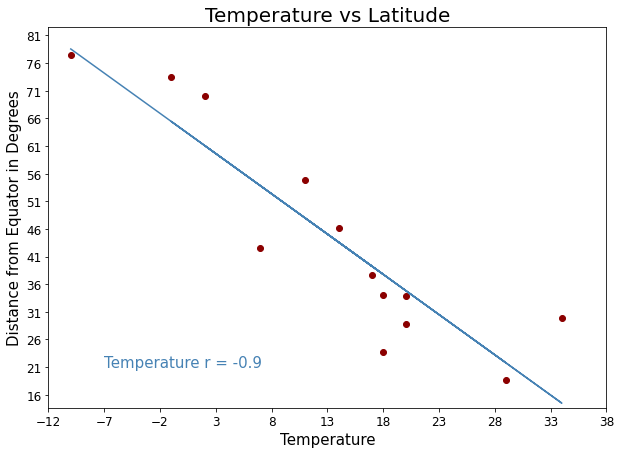

In [399]:
                                            # TEMPERATURE VS LATITUDE
# Data & calculations

x_axis_name = master_plot_list[0]                           # Set name of x axis for the sake of labels
x_axis = clean_lat_vs_temp_df[x_axis_name]                  # Set up x axis values 
y_axis = clean_lat_vs_temp_df["Degrees From Equator"]       # Set up y axis values 

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_axis, y_axis)  # Get elements of regression equation
regress_values = x_axis * slope + intercept                 # Calculate regression values

# Formating

plt.figure(figsize=(10, 7))                                 # Set up figure size a little larger than default                    
plt.xlabel(f"{x_axis_name}")                                # Set x axis label                              
plt.ylabel("Distance from Equator in Degrees")              # Set y axis label
plt.title(f"{x_axis_name} vs Latitude")                     # Set chart title
plt.xlim(x_axis.min()-2, x_axis.max()+2)                    # Give chart some white space at margins
plt.ylim(y_axis.min()-5, y_axis.max()+5)
plt.xticks(range(int(x_axis.min()-2),                       # Set up ticks on the x axis 
                 int(x_axis.max())+5,5), rotation=0 )  
plt.yticks(range(int(y_axis.min()-2),                       # Set up ticks on the y axis
                 int(y_axis.max())+5,5), rotation=0 )
     
# Plotting 

plt.scatter(x_axis, y_axis, facecolors="darkred",  alpha=1) # Plot the scatter chart

plt.annotate(f"{x_axis_name} r = {round(stats.pearsonr(x_axis, y_axis)[0],2)}", # Plot the correlation coeficient
             (-7,21), fontsize=15, color="steelblue")                                                   

plt.plot(x_axis, regress_values, color="steelblue")         # Plot the regression line

plt.show()


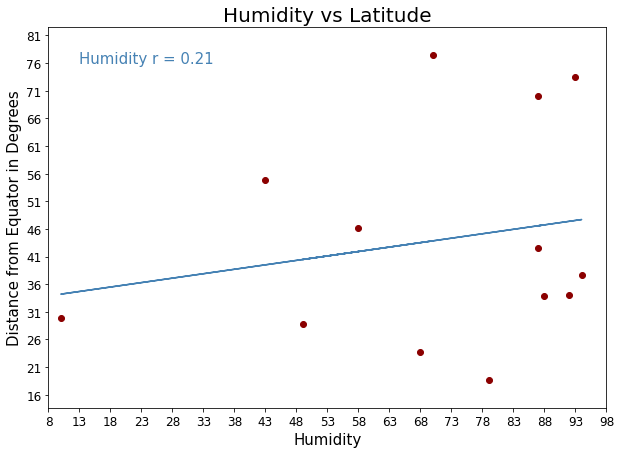

In [396]:
                                            # HUMIDITY VS LATITUDE
# Data & calculations

x_axis_name = master_plot_list[1]                           # Set name of x axis for the sake of labels
x_axis = clean_lat_vs_temp_df[x_axis_name]                  # Set up x axis values 
y_axis = clean_lat_vs_temp_df["Degrees From Equator"]       # Set up y axis values 

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_axis, y_axis)  # Get elements of regression equation
regress_values = x_axis * slope + intercept                 # Calculate regression values

# Formating
plt.figure(figsize=(10, 7))                                 # Set up figure size a little larger than default                   
plt.xlabel(f"{x_axis_name}")                                # Set x axis label                              
plt.ylabel("Distance from Equator in Degrees")              # Set y axis label
plt.title(f"{x_axis_name} vs Latitude")                     # Set chart title
plt.xlim(x_axis.min()-2, x_axis.max()+2)                    # Give chart some white space at margins
plt.ylim(y_axis.min()-5, y_axis.max()+5)
plt.xticks(range(int(x_axis.min()-2),                       # Set up ticks on the x axis 
                 int(x_axis.max())+5,5), rotation=0 )  
plt.yticks(range(int(y_axis.min()-2),                       # Set up ticks on the y axis
                 int(y_axis.max())+5,5), rotation=0 )
     
# Plotting 

plt.scatter(x_axis, y_axis, facecolors="darkred",  alpha=1) # Plot the scatter chart

plt.annotate(f"{x_axis_name} r = {round(stats.pearsonr(x_axis, y_axis)[0],2)}", # Plot the correlation coeficient
             (13,76), fontsize=15, color="steelblue")                                                   

plt.plot(x_axis, regress_values, color="steelblue")         # Plot the regression line

plt.show()


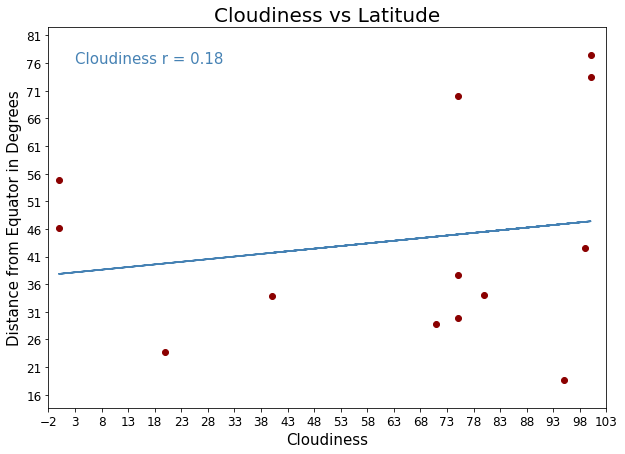

In [398]:
                                        # CLOUDINESS VS LATITUDE
# Data & calculations

x_axis_name = master_plot_list[2]                           # Set name of x axis for the sake of labels
x_axis = clean_lat_vs_temp_df[x_axis_name]                  # Set up x axis values 
y_axis = clean_lat_vs_temp_df["Degrees From Equator"]       # Set up y axis values 

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_axis, y_axis)  # Get elements of regression equation
regress_values = x_axis * slope + intercept                 # Calculate regression values

# Formating
 
plt.figure(figsize=(10, 7))                                 # Set up figure size a little larger than default                   
plt.xlabel(f"{x_axis_name}")                                # Set x axis label                              
plt.ylabel("Distance from Equator in Degrees")              # Set y axis label
plt.title(f"{x_axis_name} vs Latitude")                     # Set chart title
plt.xlim(x_axis.min()-2, x_axis.max()+2)                    # Give chart some white space at margins
plt.ylim(y_axis.min()-5, y_axis.max()+5)
plt.xticks(range(int(x_axis.min()-2),                       # Set up ticks on the x axis 
                 int(x_axis.max())+5,5), rotation=0 )  
plt.yticks(range(int(y_axis.min()-2),                       # Set up ticks on the y axis
                 int(y_axis.max())+5,5), rotation=0 )
     
# Plotting 

plt.scatter(x_axis, y_axis, facecolors="darkred",  alpha=1) # Plot the scatter chart

plt.annotate(f"{x_axis_name} r = {round(stats.pearsonr(x_axis, y_axis)[0],2)}", # Plot the correlation coeficient
             (3,76), fontsize=15, color="steelblue")                                                   

plt.plot(x_axis, regress_values, color="steelblue")         # Plot the regression line

plt.show()


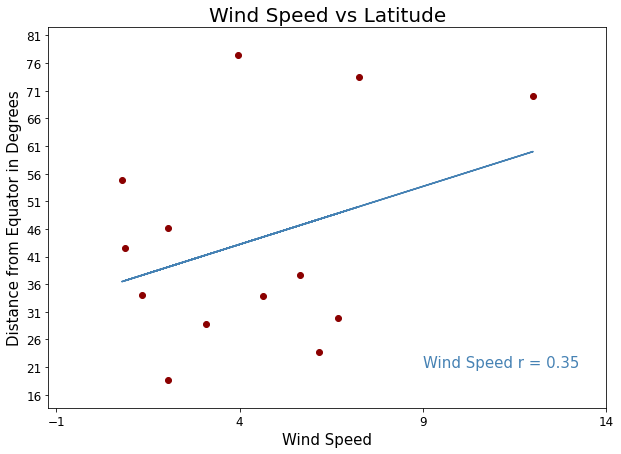

In [391]:
                                            # WIND SPEED VS LATITUDE
# Data & calculations

x_axis_name = master_plot_list[3]                           # Set name of x axis for the sake of labels
x_axis = clean_lat_vs_temp_df[x_axis_name]                  # Set up x axis values 
y_axis = clean_lat_vs_temp_df["Degrees From Equator"]       # Set up y axis values 

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_axis, y_axis)  # Get elements of regression equation
regress_values = x_axis * slope + intercept                 # Calculate regression values

# Formating

plt.figure(figsize=(10, 7))                                 # Set up figure size a little larger than default                    
plt.xlabel(f"{x_axis_name}")                                # Set x axis label                              
plt.ylabel("Distance from Equator in Degrees")              # Set y axis label
plt.title(f"{x_axis_name} vs Latitude")                     # Set chart title
plt.xlim(x_axis.min()-2, x_axis.max()+2)                    # Give chart some white space at margins
plt.ylim(y_axis.min()-5, y_axis.max()+5)
plt.xticks(range(int(x_axis.min()-2),                       # Set up ticks on the x axis 
                 int(x_axis.max())+5,5), rotation=0 )  
plt.yticks(range(int(y_axis.min()-2),                       # Set up ticks on the y axis
                 int(y_axis.max())+5,5), rotation=0 )
     
# Plotting 

plt.scatter(x_axis, y_axis, facecolors="darkred",  alpha=1) # Plot the scatter chart

plt.annotate(f"{x_axis_name} r = {round(stats.pearsonr(x_axis, y_axis)[0],2)}", # Plot the correlation coeficient
             (9,21), fontsize=15, color="steelblue")                                                   

plt.plot(x_axis, regress_values, color="steelblue")         # Plot the regression line

plt.show()
